In [1]:
### 라이브러리 호출

from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import re

In [2]:
### 한글 폰트 설정

import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

<hr>

In [3]:
df = pd.read_csv("기간_관광객_전력소비량.csv")
df

,Unnamed: 0,기간,관광객,전력소비량
0,0,2010.01 월,801636,2335102
1,1,2010.02 월,893050,2188707
2,2,2010.03 월,1090884,2091419
3,3,2010.04 월,1086594,2115785
4,4,2010.05 월,1050680,1988778
...,...,...,...,...
139,139,2021.08 월,36904,2878232
140,140,2021.09 월,39222,2636404
141,141,2021.10 월,51396,2461071
142,142,2021.11 월,57468,2519389


<hr>

<h1>평균 전력소비량 추이 VS 입국 관광객 추이 시각화</h1>

In [4]:
plt.rcParams['font.family'] = 'D2Coding'  
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus']=False

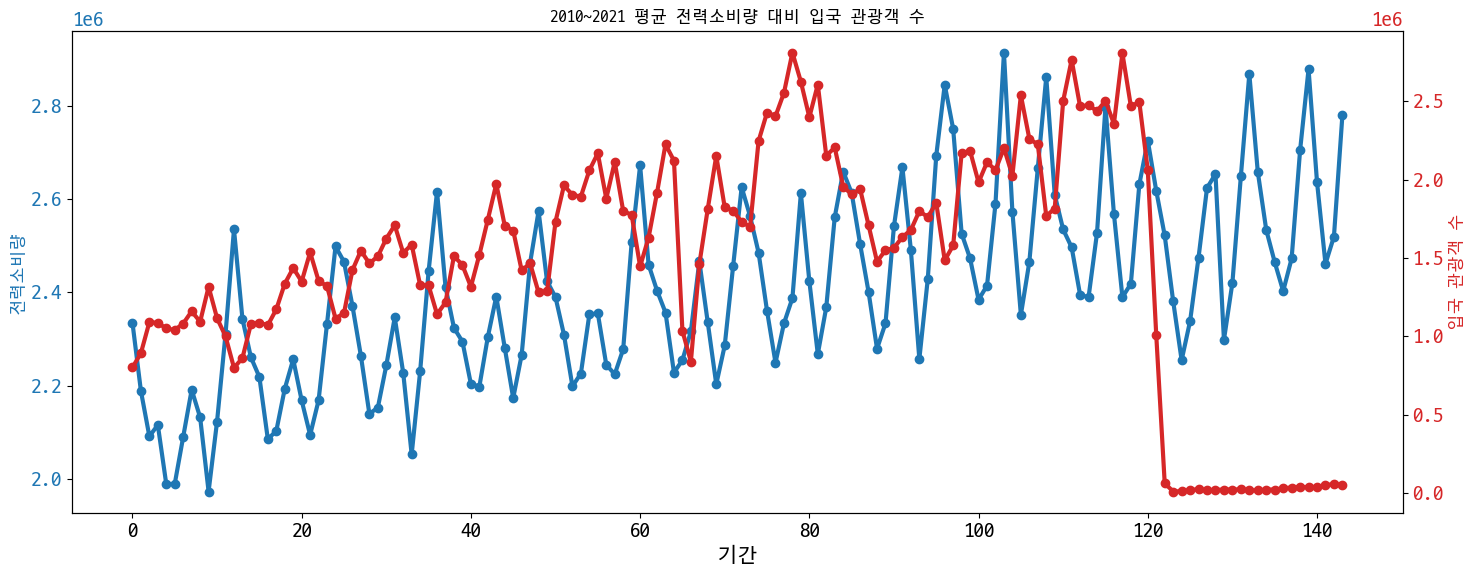

In [5]:
fig, ax1 = plt.subplots(figsize=(15,6),nrows=1,ncols=1)

color_1 = 'tab:blue'
ax1.set_title('2010~2021 평균 전력소비량 대비 입국 관광객 수', fontsize=12)
ax1.set_xlabel('기간')
ax1.set_ylabel('전력소비량', fontsize=12, color=color_1)
ax1.plot(df.index, df.전력소비량 , marker='o', color=color_1,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color_1)


ax2 = ax1.twinx() 
color_2 = 'tab:red'
ax2.set_ylabel('입국 관광객 수', fontsize=12, color=color_2)
ax2.plot(df.index, df.관광객, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()
plt.show()

In [6]:

trace1 = go.Scatter(
    x = df['기간'],
    y = df['전력소비량'],
    name='전력소비량'
)

# 두번째 x축을 기준으로 그래프 생성
trace2 = go.Scatter(
    x = df['기간'],
    y = df['관광객'],
    name='관광목적 외래객 수',
    yaxis='y2'
)

# 하나의 x축과 두 개의 y축으로 레이아웃 생성
layout = go.Layout(
    title='전력소비량 대비 관광목적 외래객 수',    
    yaxis=dict(
        title='전력소비량'
    ),
    yaxis2=dict(
        title='관광목적 외래객 수',
        overlaying='y',
        side='right'
    )
)

# 레이아웃 조합 후 그래프 작성
fig = go.Figure(data=[trace1, trace2], layout=layout)

# 그래프 표시
fig.show()

위 그래프에서 입국 관광객 수가 급격하게 줄어드는 시점 = 메르스 또는 코로나19 판데믹이 시작된 시점과 일치<br>
But, 이 그래프만으로는 입국 관광객 수가 국내 전체 전력소비량에 '절대적인' 영향을 미친다고 보기는 어려울 듯 함.